### 1. (a)
The average survival time for the Nostromo crew would have to incorporate the survival time of the tenth crew member. Without knowing that number, it's impossible to calculate the average. The tenth crewmember could go on to live decades, in which case the average time could be skewed toward a very large value.

### 1. (b)

Determining the time by which a person has at least a 50% chance of surviving we *can* do since the last crewmember only represents an extreme value, whatever it turns out to be. In other words, this problem asks us to calculate median survival time, which only requires us to figure out the survival time in the middle of the distribution, rather the average.

When there are an even number of elements in a list, the median is taken to be the average of the two numbers around the middle), so the median survival time is $\frac{1}{2} \left( 2.6 + 2.9 \right)\ {\rm days} = \boxed{2.75\,{\rm days}}$.

This problem illustrates an important advantage of the median over the mean. The mean can be highly skewed by outliers, while the median is said to be "robust" against outliers.

### 2. (a)

The mean
$$
\mu = \left(\frac{1}{n}\right) \sum_{i=1}^{n} x_i = \left( \frac{1}{11} \right) \left( 0 + 1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 \right) = \boxed{5}
$$

The median $\delta$ is the number in the middle of the sorted list, $\boxed{5}$.

The variance
$$
\sigma^2 = \left( \frac{1}{n} \right) \sum_{i=1}^{n} \left( x_i - \mu \right)^2 = \left( \frac{1}{n} \right) \left( \left( 0 - 5 \right)^2 + \left( 1 - 5 \right)^2 + \left( 2 - 5 \right)^2 + \cdots \right) \approx \boxed{11}.
$$

And the standard deviation $\sigma = \sqrt{11} = \boxed{3}$,

where I've used the correct number of significant figures (1).

### 2. (b)

Basically the same problem as before, but now our list of data looks like this:
$\left( 1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 8, 8, 9 \right)$.

We do the same calculations as before with this new list, but this time I'll show how to do with python (being sure to use the right number of sig figs).

In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

data = np.array([1,2,2,3,3,3,4,4,4,4,5,5,5,5,5,6,6,6,6,7,7,7,8,8,9])

mean = int(np.mean(data))
print("mean: ", mean)
median = int(np.median(data))
print("median: ", median)
var = int(np.var(data))
print("variance: ", var)
std = int(np.std(data))
print("standard deviation: ", std)

mean:  5
median:  5
variance:  4
standard deviation:  2


### 3.

To gauge what might be the best distribution for the data, let's make a histogram plot. It's a good guess that one of the two distributbions discussed in the chapter is the one to use (Poisson and Gaussian), so let's compare to those distributions. 

[1.0000e+00 1.0000e+00 2.0000e+00 6.0000e+00 2.4000e+01 1.2000e+02
 7.2000e+02 5.0400e+03 4.0320e+04 3.6288e+05 3.6288e+06]


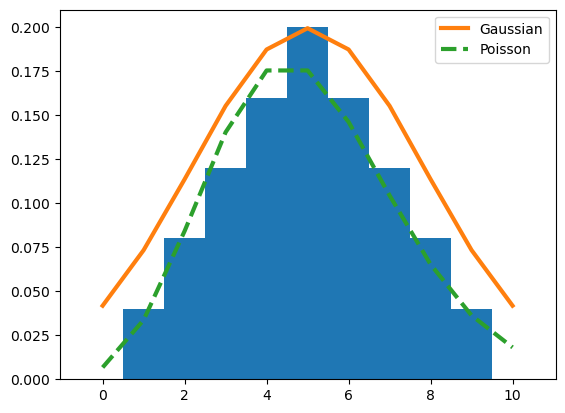

In [106]:
def factorial(x):
    if(x > 0):
        return x*factorial(x-1)
    elif(x == 0):
        return 1.

def gauss(x, mean, std):
    return np.exp(-((x - mean)/(2.*std))**2)/std/np.sqrt(2*np.pi)

def pois(x, mean):
    return mean**x/np.vectorize(factorial)(x)*np.exp(-mean)

bin_centers = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
# Python wants the bin boundaries.
bin_edges = np.array([-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5])

plt.hist(data, bins=bin_edges, density=True)
hst, bins = np.histogram(data, bins=bin_edges)

# Gaussian - plot a Gaussian with the same mean and standard deviation
gaussian = gauss(bin_centers, mean, std)
plt.plot(bin_centers, gaussian, lw=3, label="Gaussian")

# Poisson - plot a Poisson distribution with the same mean
print(np.vectorize(factorial)(bin_centers))
poisson = pois(bin_centers, mean)
plt.plot(bin_centers, poisson, ls='--', lw=3, label="Poisson")

plt.legend(loc='best')

So for two reasons, I think the Poisson distribution is a better fit:
1. It visually appears to better match the observed distribution; and
2. The data values are all integers, which is what the Poisson distribution deals in. The Gaussian distribution, on the other hand, can take decimal values.

### 4. (a)

This is a clear counting problem, so the Poisson distribution is probably the right one.

### 4. (b) 

The collision frequency $f = 170$ per century per square kilometer $ = \left( 170\right) / \left(100\,{\rm years}\ 10^6\, {\rm m^2}\right) = 1.7\times10^{-6}\, {\rm year^{-1}\ m^{-2}}$.

We can use this frequency, the time period of interest $t$, and the area $A$ to calcuate the number of events in unit time, $\mu = f\ t\ A = \left( 1.7\times10^{-6}\, {\rm year^{-1}\ m^{-2}} \right) \left( 1\, {\rm yr} \right) \left( 100\,{\rm m^2} \right) = 1.7\times10^{-4}$.

We can use the Poisson distribution $P(x, \mu)$ to estimate the chances of one collision:
$$
P(x = 1, \mu = 1.7\times10^{-4}) = \left( 1.7\times10^{-4} \right) e^{-1.7\times10^{-4}} = 0.02\%.
$$

So the chances this collision does NOT happen is $1 - P(x, \mu) =\boxed{ 99.98\% }$.

We're cheating a little bit because we didn't bother to consider the probability for $x > 1$, but the probability falls off rapidly with $x$, so our answer is good to about 7 decimal places without including those terms.

### 4. (c)
We'll use a similar approach to our answer above:
$$
\mu = \left( 1.7\times10^{-6}\, {\rm year^{-1}\ m^{-2}} \right) \left( 40\, {\rm yr} \right) \left( 100\,{\rm m^2} \right) = 0.0068.
$$

In principle, to calculate the probability for more than one collision, we should do the sum
$$
\sum_{x = 2}^{\infty} P(x, \mu = 0.0068) = \sum_{x = 2}^{\infty} \frac{\left( 0.0068 \right)^{x}}{x!} e^{-0.0068},
$$
but the terms after the first term are very small, so, to a very good approximation, our probability is just the first term, which equals $\frac{\left( 0.0068 \right)^2}{2!}e^{-0.0068} = \boxed{ 0.0023\% }$.

### 5.

Intuitively, a power law distribution with can't have a meaningful average or standard deviation without limits. If $\gamma > 0$, then the distribution approaches $\infty$ as $a \rightarrow 0$. If $\gamma < 0$, the distribution blows up for $a \rightarrow \infty$. Neither case has a finite average.

To see this mathematically, for a power law, $N(a) = N_0 a^{-\gamma}$, the average value $\langle a \rangle$ is given by:
$$
\langle a \rangle = \int_{a_{\rm min}}^{a_{\rm max}} N(a)\ a\ da = \int_{a_{\rm min}}^{a_{\rm max}} N_0 a^{-\gamma + 1}\ da.
$$

If $\gamma > 0$ and $a_{\rm min} = 0$ and $a_{\rm max} \rightarrow \infty$,
$$
\int_{a_{\rm min}}^{a_{\rm max}} N_0 a^{-\gamma + 1}\ da
$$

$$
\int_{0}^{\infty} N_0 a^{-\gamma + 1}\ da = \left( \frac{N_0}{-\gamma + 2} \right) \bigg[a^{-\gamma + 2}\bigg]_{0}^{\infty}
$$

If $\gamma > 2$, the upper limit goes to 0, while the lower limit goes to $\infty$. If $2 > \gamma > 0$, the lower limit goes to 0, while the upper limit blows up. Similar logic applies if $\gamma < 0$. 

Depending on the value of $\gamma$, finite/non-zero upper/lower limits would keep the integral from blowing up, giving a finite value for the average.

### 6.

Let's first have a look at what this function looks like.

(0.0, 0.7)

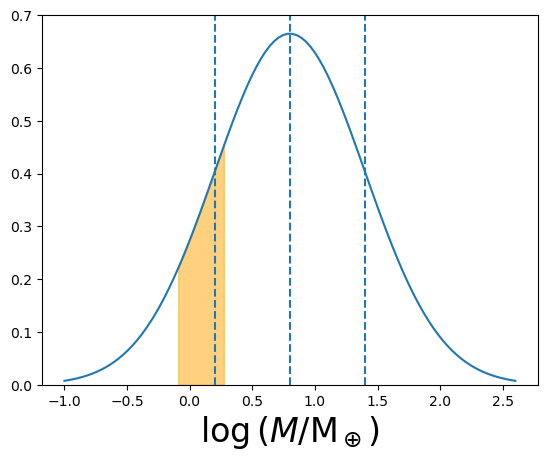

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

def gauss(x, mean, std_dev):
    return (1./np.sqrt(2*np.pi)/std_dev)*np.exp(-1./2*((x - mean)/std_dev)**2)

mean = 0.8
std_dev = 0.6

# Take a big range from 1/10 of an Earth mass up to 10 ten times (about the mass of Neptune)
q_min = mean - 3.*std_dev
q_max = mean + 3.*std_dev
qs = np.linspace(q_min, q_max, 100)


plt.plot(qs, gauss(qs, mean, std_dev))
plt.axvline(mean, ls='--')
plt.axvline(mean - std_dev, ls='--')
plt.axvline(mean + std_dev, ls='--')
plt.xlabel(r'$\log\left( M/{\rm M_\oplus} \right)$', fontsize=24)
# plt.axvspan(-0.1, 0.3, color='orange', alpha=0.5)

ind = (qs > -0.1) & (qs < 0.3)
plt.fill_between(qs[ind], np.zeros_like(qs[ind]), gauss(qs[ind], mean, std_dev), color='orange', alpha=0.5)

plt.ylim([0])

The Gaussian shows us what fraction of the planet population lies in a range of values, so we just need to integrate the Gaussian between $q = -0.1$ and $0.3$, and that will be the fraction $f$ of the 500 planets found that will be ``Earth-like'':

$$
f = \int_{q = -0.1}^{0.3} \frac{1}{\sigma \sqrt{2 \pi}} \exp\left(-\frac{1}{2} \left( \frac{q - \mu}{\sigma} \right)^2 \right)\ dq.
$$

For finite limits, there is no closed form for the Gaussian integral, though, so we have to do a numerical (approximate) integral. Python has lots of ways to do this calculation, but let's use a trapezoidal integration.

In [24]:
num_planets = 500

x = qs[ind]
y = gauss(qs[ind], mean, std_dev)
integral = np.trapz(x, y)
print("Number of Earth-like planets: ", integral*num_planets)

Number of Earth-like planets:  11.17253648636051


### 7. (a)

Since we're talking about a counting experiment, we can use Poisson statistics. The problem is asking us to estimate the number required for a signal-to-noise SNR of 5\%, i.e., 
$$
{\rm SNR} = 1/\sqrt{N} = 0.05 \Rightarrow N = 1/0.05^2 = \boxed{400}.
$$

### 7. (b)

$$
{\rm SNR} = 1/\sqrt{N} = 0.005 \Rightarrow N = 1/0.005^2 = \boxed{40000}.
$$

### 8.

In this case, half the original photons are coming from the star, i.e., $N^\prime = N/2$.

So for SNR = 5\%:
$$
{\rm SNR} = 1/\sqrt{N^\prime} = 1/\sqrt{N/2} = 0.05 \Rightarrow N = 2/0.05^2 = \boxed{800}.
$$

And similar for SNR = 0.5\%.

### 9.

We're not dealing with a counting problem but with numbers that can take on a range of values, so let's assume Gaussian statistics.

Assuming the given numbers are a representative sample (i.e., not significant or skewed outliers), we can estimate the population mean, $\mu$:
$$
\mu = \frac{1}{4} \left(74 + 41 + 61 + 57 \right)\,{\rm km\ s^{-1}} = 58,{\rm km\ s^{-1}},
$$
(remembering to keep the right number of significant figures).

And then to estimate the standard deviation of the mean (Eqn 2.26), $\sigma_{\mu}$:
$$
\sigma_{\mu} = \frac{1}{\sqrt{M}}\bigg[ \frac{1}{M - 1} \sum_{i = 0}^{M-1} \left(x_i - \mu \right)^2 \bigg]^{1/2} = \frac{s}{\sqrt{M}} = \frac{13.6\,{\rm km\ s^{-1}}}{\sqrt{4}} = 6.8\,{\rm km\ s^{-1}}.
$$

Assuming the same standard deviation $s = 13.6\,{\rm km\ s^{-1}}$ holds as we add more measurments, reducing the error on the mean to 2$\, {\rm km\ s^{-1}}$ requires satisfying
$$
2\, {\rm km\ s^{-1}} = \frac{13.6\,{\rm km\ s^{-1}}}{\sqrt{M^\prime}} \Rightarrow M^\prime = \left( 13.6/2 \right)^2 = \boxed{ 47 }.
$$

### 10.

Presumably, a new exposure ten times longer than the previous exposure results in ten times the photons. In other words, $N \rightarrow 10 N$. We can use the final expression in the example to write the new uncertainty:
$$
\sigma_\star^2 = \left( 10 N_\star \right) + \left( 0.05 \right)^2 \left( \left( 10 N_1 \right)^2 + \left( 10 N_2 \right)^2 \right) = 10 \left( 81\,{\rm photons} \right) + 100\ \left( 0.05 \right)^2 \left( \left( 166\,{\rm photons} \right)^2 + \left( 85\,{\rm photons} \right)^2 \right) = 9505
$$

Therefore

$$
\frac{10\ N_\star}{\sigma_\star } = \frac{10\ \left( 81\, {\rm photons} \right)}{ \sqrt{9505}\, {\rm photons} } = \boxed{ 8.3 },
$$
or a 12\% (= 1/8.3) precision.

### 11.

As a general rule, you should always inspect your data before conducting any analysis. This key step is referred to as ``advanced eyeball analysis''. That second measurement (81 photons) listed should immediately raise red flags for you since it's almost 10 times the next largest measurement.

So, as a first step, let's calculate the mean arrival rate $\langle r \rangle$, tossing out that large value:
$$
\langle r \rangle = \frac{\left(4 + 9 + 7 + 5\right)\, {\rm photons}}{4} = 6.25\, {\rm photons}.
$$

Then calculating the standard deviation of the sample (again, dropping the possible outlier):
$$
\sigma_r = 1.9 \, {\rm photons}.
$$

So 81 photons is almost 40 standard deviations away from the mean value for the other four measurements, which seems highly suspect (assuming we don't *expect* the brightness to vary like that).

If we assume that the observations are governed by Poisson statistics with a mean rate of $\mu = 6.25$ photons per five seconds, we can estimate the probability that 81 photons would arrive in five seconds:
$$
P_{\rm P}(x, \mu) = \frac{\mu^x}{x!} e^{-\mu} = \frac{\left( 6.25 \right)^{81}}{81!} e^{-6.25} \sim 10^{-59},
$$
so as small a probability as you could imagine.

### 12.

We'll use the same approach as for the Chapter 1 problem, but we'll include the uncertainty on the flux this time, too.

Remember that we estimate the stellar flux $F_i$ as
$$
F_i = S_i - B,
$$
where $S_i$ is the sum over the pixels representing star $i$ and $B$ is our estimate for the background.

We then divide through by the number of pixels in each star. We'll use Eqn 2.26 to estimate uncertainties for these mean values.

<ErrorbarContainer object of 3 artists>

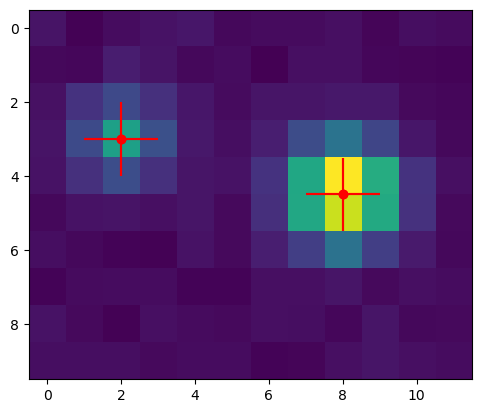

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

filename = "Chromey_data.csv"
data = np.genfromtxt(filename, delimiter=',')

(x1_cen, y1_cen) = (2, 3)
(x2_cen, y2_cen) = (8, 4.5)

delta_x = 1
delta_y = 1

plt.imshow(data)
plt.errorbar([x1_cen, x1_cen], [y1_cen, y1_cen], xerr=delta_x, yerr=delta_y, marker='o', color='red')
plt.errorbar([x2_cen, x2_cen], [y2_cen, y2_cen], xerr=delta_x, yerr=delta_y, marker='o', color='red')

In [74]:
# find background - 
# cheat a little to calculate the uncertainty on the background by only taking a few columns of non-star pixels.
background_pixels = np.array((data[:, 0], data[:, 5], data[:, -1])).flatten()
n_background = len(background_pixels)
background = np.mean(background_pixels)
sigma_background = np.std(background_pixels)/np.sqrt(n_background-1)
print("background, sigma_background: ", background, sigma_background)

star1_pixels = np.array(data[2:5, 1:4])
star1 = np.sum(star1_pixels - background)
n_star1 = len(star1_pixels.flatten())
star1 /= n_star1
sigma_star1 = np.std(star1_pixels)/np.sqrt(n_star1-1)

star2_pixels = np.array(data[3:6, 7:10])
star2 = 0.5*(data[3, 7] + data[4, 7]) - background
star2 += 0.5*(data[3, 8] + data[4, 8]) - background
star2 += 0.5*(data[3, 9] + data[4, 9]) - background
star2 += 0.5*(data[5, 7] + data[6, 7]) - background
star2 += 0.5*(data[5, 8] + data[6, 8]) - background
star2 += 0.5*(data[5, 9] + data[6, 9]) - background
n_star2 = len(star2_pixels.flatten())
star2 /= n_star2
sigma_star2 = np.std(star2_pixels)/np.sqrt(n_star2-1)

print("star1, sigma_star1: ", star1, sigma_star1)
print("star2, sigma_star2: ", star2, sigma_star2)

background, sigma_background:  25.566666666666666 0.8639435556984904
star1, sigma_star1:  75.10000000000001 17.05139290497993
star2, sigma_star2:  116.7888888888889 34.39440810134657


Now recall how to relate uncertainties:
$$
\sigma_{F_i}^2 = \sigma_{S_i}^2 + \sigma_{B}^2.
$$

And we want to convert the uncertainties on the fluxes into uncertainties on the magnitude for star 1. Recall Eqn 1.23:
$$
\Delta m = -2.5 \log_{10} \left( \frac{F_1}{F_2} \right).
$$

And then Eqn 2.31, which tells us
$$
\sigma_{\Delta m}^2 = \left( \frac{\partial \Delta m}{\partial F_1} \right)^2 \sigma_{F_1}^2 + \left( \frac{\partial \Delta m}{\partial F_2} \right)^2 \sigma_{F_2}^2 = \left( \frac{2.5}{\ln 10} \right)^2 \bigg[ \left( \frac{\sigma_{F_1}}{F_1} \right)^2 + \left( \frac{\sigma_{F_2}}{F_2} \right)^2 \bigg].
$$

In [76]:
sigma_F1 = np.sqrt(sigma_star1**2 + sigma_background**2)
sigma_F2 = np.sqrt(sigma_star2**2 + sigma_background**2)

sigma_Delta_m = 2.5/np.log(10)*np.sqrt((sigma_F1/star1)**2 + (sigma_F2/star2)**2)
print("sigma_Delta_m: ", sigma_Delta_m)

sigma_Delta_m:  0.4040179568882173


So star 2 has a magnitude of $\boxed{ 9.479\pm0.404 }$.